# Exploring Disney Land Wait Time Data Set

In [37]:
import pandas as pd ## call pandas functions using "pd"
import numpy as np  ## call numpy functions using "np"
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

from pandas import Series

#import meta data
meta = pd.read_csv("disney.csv")

#import magic kingdom rides (wait times)
splash = pd.read_csv("splash_mountain.csv")
seven_dwarfs = pd.read_csv("7_dwarfs_train.csv")
pirates = pd.read_csv('pirates_of_caribbean.csv')


In [2]:
# First five rows of meta, five columns, # start date 2012
meta.iloc[0:5, 0:10]

,DATE,WDW_TICKET_SEASON,DAYOFWEEK,DAYOFYEAR,WEEKOFYEAR,MONTHOFYEAR,YEAR,SEASON,HOLIDAYPX,HOLIDAYM
0,01/01/2012,NaN,1,0,1,1,2012,CHRISTMAS PEAK,0,5
1,01/02/2012,NaN,2,1,1,1,2012,CHRISTMAS,2,5
2,01/03/2012,NaN,3,2,1,1,2012,CHRISTMAS,3,0
3,01/04/2012,NaN,4,3,1,1,2012,CHRISTMAS,4,0
4,01/05/2012,NaN,5,4,1,1,2012,CHRISTMAS,5,0


In [3]:
# Dropping sactmin from magic world rides, then dropping NaN from spostmin

# Drop rows where wait time is not available (-999)
pirates = pirates[pirates.SPOSTMIN > 0]
seven_dwarfs = seven_dwarfs[seven_dwarfs.SPOSTMIN > 0]
splash = splash[splash.SPOSTMIN > 0]

splash.head() #has posted minutes for each ride

,date,datetime,SPOSTMIN,SACTMIN
0,01/01/2012,2012-01-01 10:31:00,30.0,NaN
1,01/01/2012,2012-01-01 10:40:00,30.0,NaN
3,01/01/2012,2012-01-01 12:02:00,30.0,NaN
5,01/01/2012,2012-01-01 12:38:00,35.0,NaN
6,01/01/2012,2012-01-01 12:44:00,25.0,NaN


In [4]:
#Merging each ride with meta_data, using date as key
meta_splash = pd.merge(splash, meta, left_on="date", right_on="DATE").drop('DATE', axis = 1)

In [5]:
#skip run due to crashing for now
#meta_dwarfs = pd.merge(seven_dwarfs, meta, left_on="date", right_on="DATE").drop('DATE', axis = 1)
#meta_pirates = pd.merge(pirates, meta, left_on="date", right_on="DATE").drop('DATE', axis = 1)

In [6]:
#change NAs to 0 values
meta_splash = meta_splash.fillna(0)
#format date in a way that can be worked with
meta_splash['date'] = pd.to_datetime(meta_splash['date'])
meta_splash.head()

,date,datetime,SPOSTMIN,SACTMIN,WDW_TICKET_SEASON,DAYOFWEEK,DAYOFYEAR,WEEKOFYEAR,MONTHOFYEAR,YEAR,...,HSFIREWKS,AKPRDDAY,AKPRDDT1,AKPRDDT2,AKPRDDN,AKFIREN,AKSHWNGT,AKSHWNT1,AKSHWNT2,AKSHWNN
0,2012-01-01,2012-01-01 10:31:00,30.0,0.0,0,1,0,1,1,2012,...,1,1,15:45,0.0,Mickey's Jingle Jungle Parade,0.0,0,0,0,0
1,2012-01-01,2012-01-01 10:40:00,30.0,0.0,0,1,0,1,1,2012,...,1,1,15:45,0.0,Mickey's Jingle Jungle Parade,0.0,0,0,0,0
2,2012-01-01,2012-01-01 12:02:00,30.0,0.0,0,1,0,1,1,2012,...,1,1,15:45,0.0,Mickey's Jingle Jungle Parade,0.0,0,0,0,0
3,2012-01-01,2012-01-01 12:38:00,35.0,0.0,0,1,0,1,1,2012,...,1,1,15:45,0.0,Mickey's Jingle Jungle Parade,0.0,0,0,0,0
4,2012-01-01,2012-01-01 12:44:00,25.0,0.0,0,1,0,1,1,2012,...,1,1,15:45,0.0,Mickey's Jingle Jungle Parade,0.0,0,0,0,0


In [7]:
#sum all posted wait times by day in meta_splash
sum_by_day = meta_splash.groupby('date')['SPOSTMIN'].mean()
#reset index to create dataframe columns
sum_by_day = sum_by_day.reset_index()
sum_by_day = pd.DataFrame(sum_by_day,columns=['date','SPOSTMIN'])
sum_by_day.head()

,date,SPOSTMIN
0,2012-01-01,37.727273
1,2012-01-02,43.750000
2,2012-01-03,5.000000
3,2012-01-04,17.142857
4,2012-01-05,41.153846


In [8]:
meta['DATE'] = pd.to_datetime(meta['DATE'])
#merge back with original meta set for daily weighted averages
meta_splash2 = pd.merge(sum_by_day, meta, left_on="date", right_on="DATE").drop('DATE', axis = 1)
meta_splash2.head()

,date,SPOSTMIN,WDW_TICKET_SEASON,DAYOFWEEK,DAYOFYEAR,WEEKOFYEAR,MONTHOFYEAR,YEAR,SEASON,HOLIDAYPX,...,HSFIREWKS,AKPRDDAY,AKPRDDT1,AKPRDDT2,AKPRDDN,AKFIREN,AKSHWNGT,AKSHWNT1,AKSHWNT2,AKSHWNN
0,2012-01-01,37.727273,NaN,1,0,1,1,2012,CHRISTMAS PEAK,0,...,1,1,15:45,NaN,Mickey's Jingle Jungle Parade,NaN,0,NaN,NaN,NaN
1,2012-01-02,43.750000,NaN,2,1,1,1,2012,CHRISTMAS,2,...,1,1,15:45,NaN,Mickey's Jingle Jungle Parade,NaN,0,NaN,NaN,NaN
2,2012-01-03,5.000000,NaN,3,2,1,1,2012,CHRISTMAS,3,...,1,1,15:45,NaN,Mickey's Jammin' Jungle Parade,NaN,0,NaN,NaN,NaN
3,2012-01-04,17.142857,NaN,4,3,1,1,2012,CHRISTMAS,4,...,1,1,15:45,NaN,Mickey's Jammin' Jungle Parade,NaN,0,NaN,NaN,NaN
4,2012-01-05,41.153846,NaN,5,4,1,1,2012,CHRISTMAS,5,...,1,1,15:45,NaN,Mickey's Jammin' Jungle Parade,NaN,0,NaN,NaN,NaN


In [11]:
#fill na for new meta splash data
meta_splash2 = meta_splash2.fillna(0)
meta_splash2.head(100)

,date,SPOSTMIN,WDW_TICKET_SEASON,DAYOFWEEK,DAYOFYEAR,WEEKOFYEAR,MONTHOFYEAR,YEAR,SEASON,HOLIDAYPX,...,HSFIREWKS,AKPRDDAY,AKPRDDT1,AKPRDDT2,AKPRDDN,AKFIREN,AKSHWNGT,AKSHWNT1,AKSHWNT2,AKSHWNN
0,2012-01-01,37.727273,0,1,0,1,1,2012,CHRISTMAS PEAK,0,...,1,1,15:45,0.0,Mickey's Jingle Jungle Parade,0.0,0,0,0,0
1,2012-01-02,43.750000,0,2,1,1,1,2012,CHRISTMAS,2,...,1,1,15:45,0.0,Mickey's Jingle Jungle Parade,0.0,0,0,0,0
2,2012-01-03,5.000000,0,3,2,1,1,2012,CHRISTMAS,3,...,1,1,15:45,0.0,Mickey's Jammin' Jungle Parade,0.0,0,0,0,0
3,2012-01-04,17.142857,0,4,3,1,1,2012,CHRISTMAS,4,...,1,1,15:45,0.0,Mickey's Jammin' Jungle Parade,0.0,0,0,0,0
4,2012-01-05,41.153846,0,5,4,1,1,2012,CHRISTMAS,5,...,1,1,15:45,0.0,Mickey's Jammin' Jungle Parade,0.0,0,0,0,0
5,2012-01-06,37.666667,0,6,5,1,1,2012,CHRISTMAS,6,...,1,1,15:45,0.0,Mickey's Jammin' Jungle Parade,0.0,0,0,0,0
6,2012-01-07,25.625000,0,7,6,1,1,2012,CHRISTMAS,7,...,1,1,15:45,0.0,Mickey's Jammin' Jungle Parade,0.0,0,0,0,0
7,2012-01-08,18.043478,0,1,7,2,1,2012,CHRISTMAS,8,...,1,1,15:45,0.0,Mickey's Jammin' Jungle Parade,0.0,0,0,0,0
8,2012-01-09,53.500000,0,2,8,2,1,2012,CHRISTMAS,8,...,1,1,15:45,0.0,Mickey's Jammin' Jungle Parade,0.0,0,0,0,0
9,2012-01-10,32.307692,0,3,9,2,1,2012,WINTER,7,...,1,1,15:45,0.0,Mickey's Jammin' Jungle Parade,0.0,0,0,0,0


In [44]:
xmas = meta_splash2[meta_splash2.SEASON == 'CHRISTMAS']
easter = meta_splash2[meta_splash2.SEASON == 'EASTER']

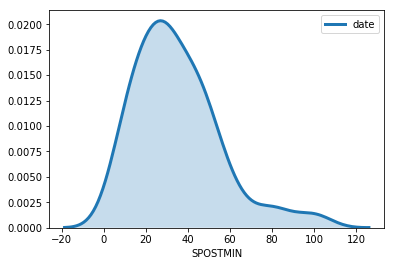

In [58]:
sns.distplot(xmas['SPOSTMIN'], hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3}, 
                  label = 'date')